In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler 

In [6]:
data = pd.read_csv('data/ACSST5Y2018.S0101_data_with_overlays_2020-09-09T171138.csv', low_memory=False, header=1)

In [7]:
# Delete margin of error columns
data = data[data.columns.drop(list(data.filter(regex='^Margin')))]

In [8]:
# Replace (X) with NaN values
data = data.replace({'(X)': np.nan})

In [9]:
# Drop estimate percent total population because it doesn't make sense
data.drop(['Estimate!!Percent!!Total population'], axis=1, inplace=True)

In [10]:
# Fill in percentage male total population
data['Estimate!!Percent Male!!Total population'] = data['Estimate!!Male!!Total population']/data['Estimate!!Total!!Total population']

In [11]:
# Fill in percentage female total population
data['Estimate!!Percent Female!!Total population'] = data['Estimate!!Female!!Total population']/data['Estimate!!Total!!Total population']



In [12]:
# Null data points
data.isnull().values.sum()

1093602

In [13]:
# Total data points
data.shape[0] * data.shape[1]

7584480

In [14]:
# Delete percent allocated columns
data.drop(['Estimate!!Female!!PERCENT ALLOCATED!!Sex'], axis=1, inplace=True)
data.drop(['Estimate!!Percent Female!!PERCENT ALLOCATED!!Sex'], axis=1, inplace=True)
data.drop(['Estimate!!Total!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Percent!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Male!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Percent Male!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Female!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Percent Female!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)

In [15]:
data.drop('Estimate!!Total!!PERCENT ALLOCATED!!Sex', axis=1, inplace=True)

In [16]:
data['zip'] = data['Geographic Area Name'].str[-5:]


In [17]:
data['zip'].nunique()

33120

#### Real estate

In [19]:
real_estate = pd.read_excel('data/HPI_AT_BDL_ZIP5.xlsx')

In [20]:
# Drop first 5 rows
real_estate = real_estate.iloc[5:]

In [21]:
# Make first row the header
real_estate.rename(columns=real_estate.iloc[0], inplace = True)

In [22]:
# Delete repeating row
real_estate = real_estate.iloc[1:]

In [23]:
# Select rows that are Year 2019t
real_estate_2019 = real_estate[real_estate['Year']=='2019']

### Veteran Status


In [25]:
veteran = pd.read_csv('data/ACSST5Y2018.S2101_data_with_overlays_2020-09-14T113935.csv', low_memory=False, header=1)

In [26]:
veteran['zip'] = veteran['Geographic Area Name'].str[-5:]

In [27]:
# Delete margin of error columns
veteran = veteran[veteran.columns.drop(list(veteran.filter(regex='^Margin')))]

### Transportation

In [29]:
transportation = pd.read_csv('data/ACSST5Y2018.S0801_data_with_overlays_2020-09-05T010054.csv', low_memory=False, header=1)

In [30]:
transportation['zip'] = transportation['Geographic Area Name'].str[-5:]

In [31]:
# Delete margin of error columns
transportation = transportation[transportation.columns.drop(list(transportation.filter(regex='MOE')))]

### Housing and Income


In [32]:
financial_char = pd.read_csv('data/ACSST5Y2018.S2503_data_with_overlays_2020-09-08T115524.csv', low_memory=False, header=1)

In [33]:
financial_char['zip'] = financial_char['Geographic Area Name'].str[-5:]

In [34]:
# Delete margin of error columns
financial_char = financial_char[financial_char.columns.drop(list(financial_char.filter(regex='^Margin')))]

### Education

In [35]:
education = pd.read_csv('data/Education.csv', low_memory=False, header=1)

In [36]:
education['zip'] = education['Geographic Area Name'].str[-5:]

In [37]:
# Delete margin of error columns
education = education[education.columns.drop(list(education.filter(regex='^Margin')))]

### Employment


In [38]:
employment = pd.read_csv('data/ACSST5Y2018.S2302_data_with_overlays_2020-09-08T190000.csv', low_memory=False, header=1)

In [39]:
# zip column
employment['zip'] = employment['Geographic Area Name'].str[-5:]

In [40]:
# Delete margin of error columns
employment = employment[employment.columns.drop(list(employment.filter(regex='^Margin')))]

### Marital status


In [41]:
marital = pd.read_csv('data/ACSST5Y2018.S1201_data_with_overlays_2020-09-14T121102.csv', low_memory=False, header=1)

In [42]:
# zip column
marital['zip'] = marital['Geographic Area Name'].str[-5:]

In [43]:
# Delete margin of error columns
marital = marital[marital.columns.drop(list(marital.filter(regex='^Margin')))]

### Language spoken at home

In [44]:
language = pd.read_csv('data/ACSST5Y2018.S1601_data_with_overlays_2020-09-14T123248.csv', low_memory=False, header=1)

In [45]:
# zip column
language['zip'] = language['Geographic Area Name'].str[-5:]

In [46]:
# Delete margin of error columns
language = language[language.columns.drop(list(language.filter(regex='^Margin')))]

In [47]:
# Drop Estimated Percent Pop 5 Years and over - no data
language.drop('Estimate!!Percent!!Population 5 years and over', axis=1, inplace=True)

### Save smaller csvs

In [ ]:
#marital.to_csv('marital.csv', index=False)

In [ ]:
#employment.to_csv('employment.csv', index=False)

In [ ]:
#education.to_csv('education.csv', index=False)

In [ ]:
#financial_char.to_csv('financial.csv', index=False)

In [ ]:
#language.to_csv('language.csv', index=False)

### Drop id and Geographic Area Name

In [48]:

employment.drop('id', axis=1, inplace=True)
employment.drop('Geographic Area Name', axis=1, inplace=True)
education.drop('id', axis=1, inplace=True)
education.drop('Geographic Area Name', axis=1, inplace=True)
financial_char.drop('id', axis=1, inplace=True)
financial_char.drop('Geographic Area Name', axis=1, inplace=True)
language.drop('id', axis=1, inplace=True)
language.drop('Geographic Area Name', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data.drop('Geographic Area Name', axis=1, inplace=True)
veteran.drop('id', axis=1, inplace=True)
veteran.drop('Geographic Area Name', axis=1, inplace=True)
marital.drop('id', axis=1, inplace=True)
marital.drop('Geographic Area Name', axis=1, inplace=True)
transportation.drop('id', axis=1, inplace=True)
transportation.drop('Geographic Area Name', axis=1, inplace=True)

In [49]:
# Make zip column the index

employment.set_index('zip', inplace=True)
education.set_index('zip', inplace=True)
financial_char.set_index('zip', inplace=True)
language.set_index('zip', inplace=True)
data.set_index('zip', inplace=True)
marital.set_index('zip', inplace=True)
veteran.set_index('zip', inplace=True)
transportation.set_index('zip', inplace=True)

In [50]:
# Drop empty columns- marital
marital.drop('Estimate!!Now married (except separated)!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)
marital.drop('Estimate!!Widowed!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)
marital.drop('Estimate!!Divorced!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)
marital.drop('Estimate!!Separated!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)
marital.drop('Estimate!!Never married!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)

In [51]:
# Delete marital columns with (X)
marital = marital.loc[:, ~(marital == '(X)').any()]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [52]:
# Delete veterans columns with (X)
veteran = veteran.loc[:, ~(veteran == '(X)').any()]

In [53]:
# Delete education columns with (X)
education = education.loc[:, ~(education == '(X)').any()]

In [54]:
# Delete financial_char columns with (X)
financial_char = financial_char.loc[:, ~(financial_char == '(X)').any()]

In [55]:
data = data.loc[:, ~(data == '(X)').any()]

In [56]:
# Delete employment columns with (X)
employment = employment.loc[:, ~(employment == '(X)').any()]

In [57]:
# Delete language columns with (X)
language = language.loc[:, ~(language == '(X)').any()]

In [58]:
# Delete transportation columns with (X)
transportation = transportation.loc[:, ~(transportation == '(X)').any()]

Most useful features idea:
1) Household income
2) Percent of children
3) Percent children under 5
4) Percent owner occupied housing
5) Overall population size
6) Percent veterans
7) Percent speak English
8) HPI
9) HPI annual change
10) Percent female population
11) Percent over 65
12) Percent population over 25 with bachelor degree
13) Percent population over 25 with graduate degree
14) Percent population over 25 with high school diploma
15) Male percent population over 25 with bachelor degree
16) Male Percent population over 25 with graduate degree
17) Percent population over 25 with high school diploma
18) Female percent population over 25 with bachelor degree
19) Female Percent population over 25 with graduate degree
20)  Female Percent population over 25 with high school diploma
21) Percent divorced
22) Percent separated
23) Percent never been married
24) Percent families - employment
25) Percent families with own children under 18 - employment
26) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife in labor force 
27) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife in labor force
28) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force
29) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force
30) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force
31) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force
32) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force
33) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force
34) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families
35) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families
36) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present
37) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present
38) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force
39) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force
40) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present 
41) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present
42) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force
43) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force
44) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!Not in labor force
45) Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!1 worker in the past 12 months
46) Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!2 or more workers in the past 12 months
47) Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHARACTERISTICS!!Families!!No workers in the past 12 months
48) Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHARACTERISTICS!!Families!!1 worker in the past 12 months
49) Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!No workers in the past 12 months
50) Percent speak spanish
51) Percent speak other language
52) Percent drive/ride in private vehicle
53) Percent walk
54) Percent public transportation
55) Percent work remote
56) Mean commute time
57) Median HH Income
58) Median Renter HH Income
59) Median Owner HH Income

In [59]:
employment_percents = employment.filter(regex='Percent')

In [60]:
veteran_percents = veteran.filter(regex='Percent')

In [61]:
education_percents = education.filter(regex='Percent')

In [62]:
marital_percents = marital.iloc[:, 1:6]

In [63]:
# Correct percentage columns for financial_char
financial_char['Estimate!!Percent owner-occupied housing units!!Occupied housing units'] = financial_char['Estimate!!Owner-occupied housing units!!Occupied housing units'] / financial_char['Estimate!!Occupied housing units!!Occupied housing units']
financial_char['Estimate!!Percent renter-occupied housing units!!Occupied housing units'] = 1 - financial_char['Estimate!!Percent owner-occupied housing units!!Occupied housing units']

In [64]:
financial_char_percents = financial_char.filter(regex='Percent')

In [121]:
language_percents = language.filter(regex='Percent')

### Histogram of size of population by zip code

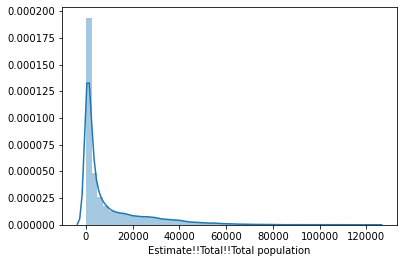

In [66]:
sns.distplot(data['Estimate!!Total!!Total population'])

In [67]:
total_pop = data['Estimate!!Total!!Total population']

In [68]:
data_percents = data.filter(regex='Percent')

In [69]:
# Concatenate total population back to data percents
data_percents['total_pop'] = total_pop

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
# replace '-' with NaN
data_percents = data_percents.replace({'-': np.nan})

In [71]:
# Drop columns with all nans

data_percents.dropna(axis=1, how='all', inplace=True)

In [72]:
# Change all data_percents columns to floats
for i in data_percents.columns:
    try:
        data_percents[i] = data_percents[i].astype(float)
    except:
        continue


In [73]:
# Delete columns in data that are not floats
data_percents = data_percents.select_dtypes(exclude=['object'])

#### Edit real estate dataset

In [74]:
real_estate_2019.rename(columns={'Five-Digit ZIP Code': 'zip'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [75]:
real_estate_2019 = real_estate_2019[['zip', 'Annual Change (%)', 'HPI']]

In [76]:
# Set zip as index
real_estate_2019.set_index('zip', inplace=True)

In [77]:
# Rename Annual Change(%) 
real_estate_2019.rename(columns={'Annual Change (%)': 'HPI_%_Annual_Change'}, inplace=True)

#### Edit education percents dataset

In [78]:
# replace '-' with NaN
education_percents = education_percents.replace({'-': np.nan})

In [79]:
# Change all education_percents columns to floats
for i in education_percents.columns:
    try:
        education_percents[i] = education_percents[i].astype(float)
    except:
        continue

In [80]:
list(education_percents.columns)

['Estimate!!Percent Male!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher',
 'Estimate!!Percent Female!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher',
 "Estimate!!Percent!!Population 25 years and over!!Population 35 to 44 years!!Bachelor's degree or higher",
 "Estimate!!Percent Male!!Population 25 years and over!!Population 35 to 44 years!!Bachelor's degree or higher",
 "Estimate!!Percent Female!!Population 25 years and over!!Population 35 to 44 years!!Bachelor's degree or higher",
 'Estimate!!Percent!!Population 25 years and over!!Population 45 to 64 years!!High school graduate or higher',
 'Estimate!!Percent Male!!Population 25 years and over!!Population 45 to 64 years!!High school graduate or higher',
 'Estimate!!Percent Female!!Population 25 years and over!!Population 45 to 64 years!!High school graduate or higher',
 "Estimate!!Percent!!Population 25 years and over!!Population 45 to 64 years!!Bachelo

In [81]:
education_percents = education_percents[["Estimate!!Percent!!Population 25 years and over!!Bachelor's degree", 
                                         "Estimate!!Percent!!Population 25 years and over!!Graduate or professional degree", 
                                         "Estimate!!Percent!!Population 25 years and over!!High school graduate or higher", 
                                         "Estimate!!Percent!!Population 25 years and over!!Some college, no degree", 
                                         "Estimate!!Percent Male!!Population 25 years and over!!Bachelor's degree", 
                                         "Estimate!!Percent Female!!Population 25 years and over!!Bachelor's degree", 
                                         "Estimate!!Percent Male!!Population 25 years and over!!Graduate or professional degree", 
                                         "Estimate!!Percent Female!!Population 25 years and over!!Graduate or professional degree", 
                                         "Estimate!!Percent Male!!Population 25 years and over!!High school graduate or higher", 
                                         "Estimate!!Percent Female!!Population 25 years and over!!High school graduate or higher"]]

In [82]:
education_percents.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 33120 entries, 00601 to 99929
Data columns (total 10 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Estimate!!Percent!!Population 25 years and over!!Bachelor's degree                       32763 non-null  float64
 1   Estimate!!Percent!!Population 25 years and over!!Graduate or professional degree         32763 non-null  float64
 2   Estimate!!Percent!!Population 25 years and over!!High school graduate or higher          32763 non-null  float64
 3   Estimate!!Percent!!Population 25 years and over!!Some college, no degree                 32763 non-null  float64
 4   Estimate!!Percent Male!!Population 25 years and over!!Bachelor's degree                  32664 non-null  float64
 5   Estimate!!Percent Female!!Population 25 years and over!!Bache

#### Edit employment percents dataset

In [83]:
employment_percents = employment_percents.replace({'-': np.nan})

In [84]:
# Change all employment_percent columns to floats
for i in employment_percents.columns:
    try:
        employment_percents[i] = employment_percents[i].astype(float)
    except:
        continue

In [85]:
employment_percents.rename(columns={'Estimate!!Percent Families with own children under 18 years!!Families' : 'Percent_Families_With_Children'}, inplace=True)


In [86]:
employment_percents['Percent_Families_With_Children'] = employment_percents['Percent_Families_With_Children']/employment_percents['Estimate!!Percent!!Families']*100

In [87]:
employment_percents = employment_percents[['Percent_Families_With_Children','Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force',
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force',
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families', 'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families',
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present',
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present',  
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!Not in labor force', 
'Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!1 worker in the past 12 months', 
'Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!2 or more workers in the past 12 months',
'Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHARACTERISTICS!!Families!!No workers in the past 12 months', 
'Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHARACTERISTICS!!Families!!1 worker in the past 12 months', 
'Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!No workers in the past 12 months']]


#### Edit veteran percents dataset

In [88]:
veteran_percents = veteran_percents.replace({'-': np.nan})

In [89]:
# Change all veteran_percent columns to floats
for i in veteran_percents.columns:
    try:
        veteran_percents[i] = veteran_percents[i].astype(float)
    except:
        continue

In [90]:
veteran_percents.rename(columns = {'Estimate!!Percent Veterans!!Civilian population 18 years and over' : 'Percent_Veterans'}, inplace=True)

In [91]:
veteran_percents = veteran_percents[['Percent_Veterans']]

#### Edit marital percents dataset


In [92]:
marital_percents = marital_percents.replace({'-': np.nan})

In [93]:
# Change all marital_percent columns to floats
for i in marital_percents.columns:
    try:
        marital_percents[i] = marital_percents[i].astype(float)
    except:
        continue

####  Edit financial char percents dataset

In [94]:
financial_char_percents = financial_char_percents.replace({'-': np.nan})

In [95]:
# Change all financial_char_percent columns to floats
for i in financial_char_percents.columns:
    try:
        financial_char_percents[i] = financial_char_percents[i].astype(float)
    except:
        continue

In [96]:
financial_char.rename(columns = {'Estimate!!Percent owner-occupied housing units!!Occupied housing units': 'Percent_Owner_Occupied'}, inplace=True)

In [97]:
financial_char.rename(columns = {'Estimate!!Percent occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)' : 'Median_HH_Income'}, inplace=True)

In [98]:
financial_char.rename(columns = {'Estimate!!Percent owner-occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)' : 'Median_Owner_HH_Income'}, inplace=True)

In [99]:
financial_char.rename(columns = { 'Estimate!!Percent renter-occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)' : 'Median_Renter_HH_Income'}, inplace=True)

In [100]:
financial_percents = financial_char[['Percent_Owner_Occupied', 'Median_HH_Income', 'Median_Owner_HH_Income', 'Median_Renter_HH_Income']]

In [101]:
financial_percents['Percent_Owner_Occupied'] = financial_percents['Percent_Owner_Occupied']*100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Edit language percents dataset

In [126]:
language_percents.head(1)

,"Estimate!!Percent of specified language speakers!!Speak English only or speak English very well""!!Population 5 years and over""","Estimate!!Percent of specified language speakers!!Percent speak English only or speak English very well""!!Population 5 years and over""","Estimate!!Percent of specified language speakers!!Speak English less than very well""!!Population 5 years and over""","Estimate!!Percent of specified language speakers!!Percent speak English less than very well""!!Population 5 years and over""",Estimate!!Percent!!Population 5 years and over!!Speak only English,Estimate!!Percent!!Population 5 years and over!!Speak a language other than English,"Estimate!!Percent of specified language speakers!!Speak English only or speak English very well""!!Population 5 years and over!!Speak a language other than English""","Estimate!!Percent of specified language speakers!!Percent speak English only or speak English very well""!!Population 5 years and over!!Speak a language other than English""","Estimate!!Percent of specified language speakers!!Speak English less than very well""!!Population 5 years and over!!Speak a language other than English""","Estimate!!Percent of specified language speakers!!Percent speak English less than very well""!!Population 5 years and over!!Speak a language other than English""",...,Estimate!!Percent!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Spanish,"Estimate!!Percent of specified language speakers!!Speak English only or speak English very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Spanish""","Estimate!!Percent of specified language speakers!!Percent speak English only or speak English very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Spanish""","Estimate!!Percent of specified language speakers!!Speak English less than very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Spanish""","Estimate!!Percent of specified language speakers!!Percent speak English less than very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Spanish""",Estimate!!Percent!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Other languages,"Estimate!!Percent of specified language speakers!!Speak English only or speak English very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""","Estimate!!Percent of specified language speakers!!Percent speak English only or speak English very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""","Estimate!!Percent of specified language speakers!!Speak English less than very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""","Estimate!!Percent of specified language speakers!!Percent speak English less than very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Other languages"""
zip,,,,,,,,,,,,,,,,,,,,,
00601,2236,13.7,14138,86.3,5.3,94.7,1363,8.8,14138,91.2,...,94.4,1158,9.1,11529,90.9,0.0,0,-,0,-


In [127]:

language_percents.rename(columns = {'Estimate!!Percent!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Spanish' : "Speaks_Spanish"}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [128]:
language_percents.rename(columns = {'Estimate!!Percent!!Population 5 years and over!!Speak only English' : "Speak_Only_English"}, inplace=True)


In [129]:
language_percents.rename(columns = {'Estimate!!Percent!!Population 5 years and over!!Speak a language other than English' : "Speaks_Other_Language"}, inplace=True)

In [130]:
language_percents.rename(columns = {'Estimate!!Percent of specified language speakers!!Percent speak English less than very well"!!Population 5 years and over"' : "Poor_English_Speaking"}, inplace=True)

In [131]:
language_percents.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 33120 entries, 00601 to 99929
Data columns (total 110 columns):
 #   Column                                                                                                                                                                                                                                  Dtype 
---  ------                                                                                                                                                                                                                                  ----- 
 0   Estimate!!Percent of specified language speakers!!Speak English only or speak English very well"!!Population 5 years and over"                                                                                                          int64 
 1   Estimate!!Percent of specified language speakers!!Percent speak English only or speak English very well"!!Population 5 years and over"                    

In [134]:
# Select just three columns

language_percents = language_percents[['Speaks_Spanish', 'Speaks_Other_Language', 'Speak_Only_English', 'Poor_English_Speaking']]

In [135]:
language_percents = language_percents.replace({'-': np.nan})

In [136]:
# Change all languagepercent columns to floats
for i in language_percents.columns:
    try:
        language_percents[i] = language_percents[i].astype(float)
    except:
        continue

#### Edit transportation dataset

In [137]:
# Rename columns

transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van' : 'Percent_Private_Vehicle'}, inplace=True)

In [138]:
transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)' : 'Percent_Public_Trans'}, inplace=True)

In [139]:
transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Walked' : 'Percent_Walked'}, inplace=True)

In [140]:
transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked at home' :'Percent_Remote_Work'}, inplace=True)

In [141]:
transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)': 'Mean_Commute_Time'}, inplace=True)
                                 

In [142]:
transportation_percents = transportation[['Percent_Private_Vehicle', 'Percent_Public_Trans', 'Percent_Walked', 'Percent_Remote_Work', 'Mean_Commute_Time']]

In [143]:
transportation_percents = transportation_percents.replace({'-': np.nan})

In [144]:
transportation_percents = transportation_percents.replace({'N': np.nan})

In [145]:
# Change all transportation_percent columns to floats
for i in transportation_percents.columns:
    try:
        transportation_percents[i] = transportation_percents[i].astype(float)
    except:
        continue

#### Edit Data Percents

In [146]:
data_percents.rename(columns={'Estimate!!Percent!!Total population!!AGE!!Under 5 years' : 'Percent_Under_5'}, inplace=True)

In [147]:
data_percents.rename(columns=  {'Estimate!!Percent!!Total population!!AGE!!5 to 9 years': 'Percent_5_to_9'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!10 to 14 years': 'Percent_10_to_14'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!15 to 19 years': 'Percent_15_to_19'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!20 to 24 years': 'Percent_20_to_24'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!25 to 29 years': 'Percent_25_to_29'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!30 to 34 years': 'Percent_30_to_34'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!35 to 39 years': 'Percent_35_to_39'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!40 to 44 years': 'Percent_40_to_44'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!45 to 49 years': 'Percent_45_to_49'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!50 to 54 years': 'Percent_50_to_54'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!55 to 59 years': 'Percent_55_to_59'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!60 to 64 years': 'Percent_60_to_64'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!65 to 69 years': 'Percent_65_to_69'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!70 to 74 years': 'Percent_70_to_74'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!75 to 79 years': 'Percent_75_to_79'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!80 to 84 years': 'Percent_80_to_84'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!85 years and over': 'Percent_85_Plus'}, inplace=True)


In [148]:
data_percents = data_percents[['total_pop', 'Percent_Under_5', 'Percent_5_to_9', 
                               'Percent_10_to_14', 'Percent_15_to_19', 'Percent_20_to_24', 
                               'Percent_25_to_29', 'Percent_30_to_34', 'Percent_35_to_39', 
                               'Percent_40_to_44', 'Percent_45_to_49', 'Percent_50_to_54', 
                               'Percent_55_to_59', 'Percent_60_to_64', 'Percent_65_to_69', 
                               'Percent_70_to_74', 'Percent_75_to_79', 'Percent_80_to_84', 'Percent_85_Plus']]

#### Concatenate columns together based on 


In [164]:
# Merge columns together

final = pd.concat([data_percents, education_percents, employment_percents, language_percents, veteran_percents, transportation_percents, financial_percents, marital_percents, real_estate_2019], axis=1)

In [150]:
final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 33147 entries, 00601 to 99623
Data columns (total 73 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                              --------------  -----  
 0   total_pop                                                                                                                                                                           33120 non-null  float64
 1   Percent_Under_5                                                                                                                                                                     32799 non-null  float64
 2   Percent_5_to_9                                     

In [165]:
# Fix the remaining object datatypes in the final. Cut down zip codes less than 2000
final['Mean_Commute_Time'] = final['Mean_Commute_Time'].astype(float)

In [166]:
final['Median_HH_Income'] = final['Median_HH_Income'].replace({'-': np.nan})


In [167]:
final['Median_HH_Income'] = final['Median_HH_Income'].replace({'2,500-': 2500.0})

In [168]:
final['Median_HH_Income'] = final['Median_HH_Income'].replace({'250,000+': 250000.0})

In [169]:
final['Median_HH_Income'] = final['Median_HH_Income'].astype(float)

In [170]:
final['Median_Owner_HH_Income'] = final['Median_Owner_HH_Income'].replace({'-': np.nan})
final['Median_Owner_HH_Income'] = final['Median_Owner_HH_Income'].replace({'2,500-': 2500.0})
final['Median_Owner_HH_Income'] = final['Median_Owner_HH_Income'].replace({'250,000+': 250000.0})

In [171]:
final['Median_Owner_HH_Income'] = final['Median_Owner_HH_Income'].astype(float)

In [173]:
final['HPI_%_Annual_Change'] = final['HPI_%_Annual_Change'].replace({'.': np.nan})

In [174]:
final['HPI_%_Annual_Change'] = final['HPI_%_Annual_Change'].astype(float)

In [176]:
final['Median_Renter_HH_Income'] = final['Median_Renter_HH_Income'].replace({'-': np.nan})
final['Median_Renter_HH_Income'] = final['Median_Renter_HH_Income'].replace({'2,500-': 2500.0})
final['Median_Renter_HH_Income'] = final['Median_Renter_HH_Income'].replace({'250,000+': 250000.0})
final['Median_Renter_HH_Income'] = final['Median_Renter_HH_Income'].astype(float)

In [179]:
final['HPI'] = final['HPI'].replace({'.': np.nan})
final['HPI'] = final['HPI'].astype(float)

In [182]:
final.dtypes.unique()

array([dtype('float64')], dtype=object)

In [186]:
# Drop zip codes with fewer than 2000 people
final = final[final['total_pop'] >= 2000]

In [188]:
# Save to csv

final.to_csv('data/final.csv', index=False)

## EDA

In [ ]:
# First do EDA on individual features
# Then figure out NaNs
# Then scale between 0 and 1

scaler = StandardScaler()
scaler.fit(data)

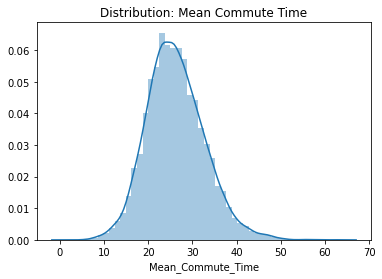

In [190]:
ax = sns.distplot(final['Mean_Commute_Time'])
ax.set_title("Distribution: Mean Commute Time");

In [193]:
final['Mean_Commute_Time'].describe()

count    18633.000000
mean        26.208571
std          6.567243
min          1.000000
25%         21.700000
50%         25.700000
75%         30.300000
max         64.200000
Name: Mean_Commute_Time, dtype: float64

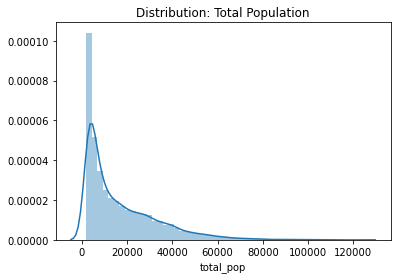

In [199]:
ax = sns.distplot(final['total_pop'])
ax.set_title("Distribution: Total Population");

In [195]:
final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 18654 entries, 00601 to 99929
Data columns (total 73 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                              --------------  -----  
 0   total_pop                                                                                                                                                                           18654 non-null  float64
 1   Percent_Under_5                                                                                                                                                                     18654 non-null  float64
 2   Percent_5_to_9                                     

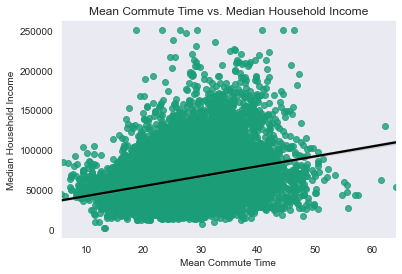

In [232]:
sns.set_palette("Dark2")
sns.set_style("dark")
ax = sns.regplot(x='Mean_Commute_Time', 
                 y='Median_HH_Income', data=final, line_kws= {"color": 'black'})
ax.set_title("Mean Commute Time vs. Median Household Income")
ax.set_xlabel('Mean Commute Time')
ax.set_ylabel('Median Household Income');

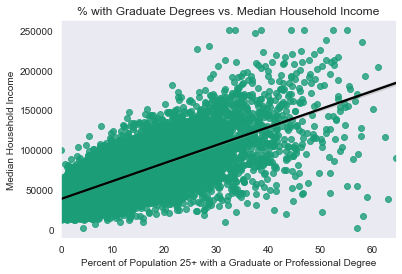

In [233]:
ax = sns.regplot(x='Estimate!!Percent!!Population 25 years and over!!Graduate or professional degree', 
                 y='Median_HH_Income', data=final, line_kws= {"color": 'black'})
ax.set_title("% with Graduate Degrees vs. Median Household Income")
ax.set_xlabel('Percent of Population 25+ with a Graduate or Professional Degree')
ax.set_ylabel('Median Household Income');

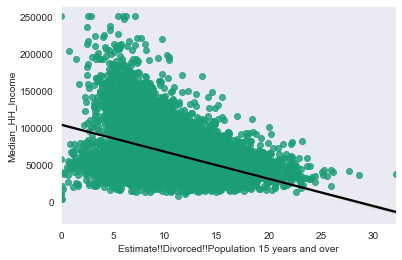

In [234]:
ax = sns.regplot(x = 'Estimate!!Divorced!!Population 15 years and over', y='Median_HH_Income', data=final, line_kws= {"color": 'black'})


It appears that there is a negative correlation between Divorced Population and median household income

### Deal with NaNs

Two options 1. Delete rows with missing values, 2. Impute values with missing values

In [257]:
final_del_nans = final.copy()

In [259]:
final_del_nans.dropna(axis=0, how='any', inplace=True)

In [260]:
final_del_nans.shape

(14633, 73)

In [276]:
scaler = StandardScaler()
scaled = scaler.fit_transform(final_del_nans)

In [277]:
scaled = pd.DataFrame(scaled, index=final_del_nans.index, columns=final_del_nans.columns)

In [440]:
similarity_matrix = linear_kernel(scaled, scaled)

In [462]:
cosine_matrix = cosine_similarity(scaled, scaled)

In [432]:

mapping = pd.Series(scaled.reset_index().index, index = scaled.index)

In [446]:
def recommend_zip_based_on_prev_zip(zip_input):
    zip_index = int(mapping[zip_input])
    #get similarity values with other zip codes
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(similarity_matrix[zip_index]))
    #sort in descending order the similarity score of zip inputted with all the other zip codes
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
    similarity_score = similarity_score[0:15]
    #return zip codes using the mapping series
    zip_indices = [i[0] for i in similarity_score]
    best = []
    for i in zip_indices:
        best.append(final_del_nans.reset_index().iloc[i][0])
    print(similarity_score)
    return best

In [537]:
def cosine_recommend_zip(zip_input):
    zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')
    zip_index = int(mapping[zip_input])
    #get similarity values with other zip codes
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(cosine_matrix[zip_index]))
    #sort in descending order the similarity score of zip inputted with all the other zip codes
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
    similarity_score = similarity_score[1:16]
    #return zip codes using the mapping series
    zip_indices = [i[0] for i in similarity_score]
    best = []
    for i in zip_indices:
        best.append(int(final_del_nans.reset_index().iloc[i][0]))
    df = pd.DataFrame(data = best, columns = ['Zip'])
    return pd.merge(df,zip_location,on='Zip',how='left')
    #left merge join on zip
    #return zip_location.loc[zip_location['Zip'].isin(best)].set_index('Zip').sort_index(level=pd.Series(best))

In [538]:
cosine_recommend_zip('36027')

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,28352,Laurinburg,NC,34.779227,-79.45745,-5,1,"34.779227,-79.45745"
1,71220,Bastrop,LA,32.814969,-91.90678,-6,1,"32.814969,-91.90678"
2,27870,Roanoke Rapids,NC,36.448592,-77.67144,-5,1,"36.448592,-77.67144"
3,29624,Anderson,SC,34.478139,-82.64550,-5,1,"34.478139,-82.6455"
4,39701,Columbus,MS,33.492107,-88.43746,-6,1,"33.492107,-88.43746"
5,38701,Greenville,MS,33.380388,-91.05187,-6,1,"33.380388,-91.05187"
6,28501,Kinston,NC,35.260895,-77.56469,-5,1,"35.260895,-77.56469"
7,24541,Danville,VA,36.581085,-79.45027,-5,1,"36.581085,-79.45027"
8,42501,Somerset,KY,37.075624,-84.54437,-5,1,"37.075624,-84.54437"
9,39090,Kosciusko,MS,33.038079,-89.56318,-6,1,"33.038079,-89.56318"


#### Map zip codes to cities

In [480]:
zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')

In [530]:
zip_location.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,67553,Liebenthal,KS,38.654948,-99.320620,-6,1,"38.654948,-99.32062"
1,85743,Tucson,AZ,32.335122,-111.148880,-7,0,"32.335122,-111.14888"
2,75016,Irving,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"
3,60401,Beecher,IL,41.350484,-87.624080,-6,1,"41.350484,-87.62408"
4,80432,Como,CO,39.243440,-105.794310,-7,1,"39.24344,-105.79431"


In [487]:
zip_location.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,67553,Liebenthal,KS,38.654948,-99.320620,-6,1,"38.654948,-99.32062"
1,85743,Tucson,AZ,32.335122,-111.148880,-7,0,"32.335122,-111.14888"
2,75016,Irving,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"
3,60401,Beecher,IL,41.350484,-87.624080,-6,1,"41.350484,-87.62408"
4,80432,Como,CO,39.243440,-105.794310,-7,1,"39.24344,-105.79431"
